In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from utils import get_best_threshold

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

from utils import (
    print_confusion_matrix,
    get_prepared_train_test,
    get_best_metric_for_optuna,
    get_feature_to_importance,
)

In [4]:
train_data_raw = pd.read_csv("../dataset/custom/features_fixed/wallets_features_with_users__train.csv")
test_data_raw = pd.read_csv("../dataset/custom/features_fixed/wallets_features_with_users__test.csv")


In [5]:
X_train, X_test, y_train, y_test = get_prepared_train_test(
    train_data_raw,
    test_data_raw,
)
X_train.shape, X_test.shape

((552376, 51), (281034, 51))

# XGB


        Best threshold: 0.053526315789473686
        Best F1: 0.12191410856251665, precicion: 0.06666944022632247, recall: 0.7114317425083241
        


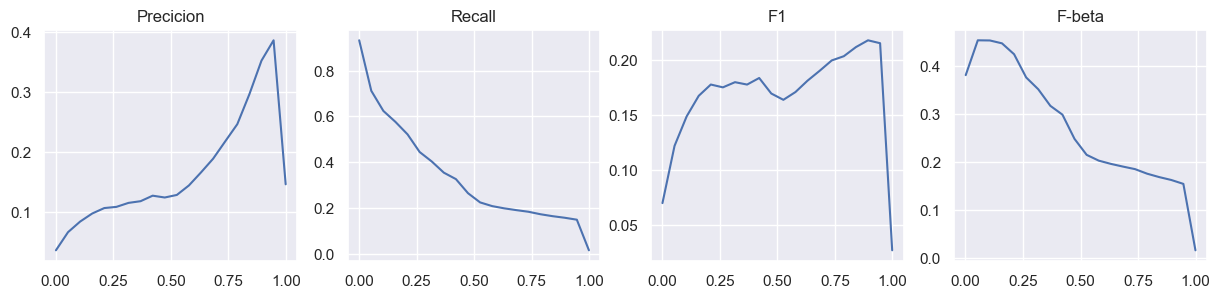

In [27]:
import xgboost as xgb

column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(X_train.columns))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('xgb', xgb.XGBClassifier(scale_pos_weight=50))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

res = get_best_threshold(y_pred, y_test, return_hists=True)

In [30]:
from sklearn.metrics import classification_report
thr = 0.3
print_confusion_matrix(y_pred, thr, y_test)

report_dict = classification_report(y_test, (y_pred >= thr).astype(int), output_dict=True)
pd.DataFrame(report_dict)


	real 1	real 0
pred 1	1854	14606	
pred 0	2651	261923	


,0,1,accuracy,macro avg,weighted avg
precision,0.989980,0.112637,0.938595,0.551308,0.975916
recall,0.947181,0.411543,0.938595,0.679362,0.938595
f1-score,0.968108,0.176866,0.938595,0.572487,0.955424
support,276529.000000,4505.000000,0.938595,281034.000000,281034.000000


[I 2025-04-03 18:40:52,635] A new study created in memory with name: no-name-fd2c42b3-a2d4-4048-9cde-aea1bdb35a76


[I 2025-04-03 18:40:54,507] Trial 0 finished with value: 0.2449521542053935 and parameters: {'n_estimators': 263, 'max_depth': 7, 'learning_rate': 0.203908672635212, 'subsample': 0.8419194690139145, 'colsample_bytree': 0.5908912929306002, 'min_child_weight': 2, 'gamma': 4.587787224026227, 'reg_alpha': 8.849289798320433, 'reg_lambda': 2.791269801386421, 'scale_pos_weight': 1.896646191982033}. Best is trial 0 with value: 0.2449521542053935.


	real 1	real 0
pred 1	1070	2751	
pred 0	3435	273778	


[I 2025-04-03 18:40:58,963] Trial 1 finished with value: 0.25878664539904295 and parameters: {'n_estimators': 471, 'max_depth': 5, 'learning_rate': 0.08952848761965422, 'subsample': 0.9042440358984853, 'colsample_bytree': 0.7527258680741166, 'min_child_weight': 2, 'gamma': 4.158879273511445, 'reg_alpha': 5.280469520256224, 'reg_lambda': 9.004213642039108, 'scale_pos_weight': 44.16101801105212}. Best is trial 1 with value: 0.25878664539904295.


	real 1	real 0
pred 1	1882	16460	
pred 0	2623	260069	


[I 2025-04-03 18:41:04,192] Trial 2 finished with value: 0.21092300556586271 and parameters: {'n_estimators': 282, 'max_depth': 11, 'learning_rate': 0.011168934500463917, 'subsample': 0.6425637856638369, 'colsample_bytree': 0.8019142240084167, 'min_child_weight': 2, 'gamma': 2.300395930631866, 'reg_alpha': 8.205178392599933, 'reg_lambda': 7.930491122795955, 'scale_pos_weight': 38.86059440373356}. Best is trial 1 with value: 0.25878664539904295.


	real 1	real 0
pred 1	1819	23281	
pred 0	2686	253248	


[I 2025-04-03 18:41:05,361] Trial 3 finished with value: 0.2067631892106307 and parameters: {'n_estimators': 61, 'max_depth': 7, 'learning_rate': 0.04399043710056352, 'subsample': 0.656459634675074, 'colsample_bytree': 0.9431315411997752, 'min_child_weight': 7, 'gamma': 1.7585053918747018, 'reg_alpha': 7.455508289268038, 'reg_lambda': 3.660351982675545, 'scale_pos_weight': 26.861001102390347}. Best is trial 1 with value: 0.25878664539904295.


	real 1	real 0
pred 1	1668	20648	
pred 0	2837	255881	


[I 2025-04-03 18:41:08,039] Trial 4 finished with value: 0.22192054081010695 and parameters: {'n_estimators': 279, 'max_depth': 4, 'learning_rate': 0.035282839338799346, 'subsample': 0.5873131011231818, 'colsample_bytree': 0.847814668681643, 'min_child_weight': 2, 'gamma': 0.9121054024404762, 'reg_alpha': 1.0602787678002157, 'reg_lambda': 2.981875331165451, 'scale_pos_weight': 19.530719041841127}. Best is trial 1 with value: 0.25878664539904295.


	real 1	real 0
pred 1	2403	33718	
pred 0	2102	242811	


[I 2025-04-03 18:41:09,373] Trial 5 finished with value: 0.20687732342007434 and parameters: {'n_estimators': 106, 'max_depth': 5, 'learning_rate': 0.12284857888815502, 'subsample': 0.8631270219608156, 'colsample_bytree': 0.9520155794814844, 'min_child_weight': 9, 'gamma': 3.031693309544183, 'reg_alpha': 6.327443702998731, 'reg_lambda': 3.0926969992414053, 'scale_pos_weight': 45.888752213841414}. Best is trial 1 with value: 0.25878664539904295.


	real 1	real 0
pred 1	2226	33554	
pred 0	2279	242975	


[I 2025-04-03 18:41:13,768] Trial 6 finished with value: 0.23770318767152207 and parameters: {'n_estimators': 307, 'max_depth': 8, 'learning_rate': 0.10207633963804974, 'subsample': 0.6260798737695208, 'colsample_bytree': 0.6172590166402774, 'min_child_weight': 1, 'gamma': 1.6991958428170468, 'reg_alpha': 3.0184372484027944, 'reg_lambda': 5.675636846888471, 'scale_pos_weight': 4.781259326592043}. Best is trial 1 with value: 0.25878664539904295.


	real 1	real 0
pred 1	1126	4539	
pred 0	3379	271990	


[I 2025-04-03 18:41:15,767] Trial 7 finished with value: 0.23889484339645112 and parameters: {'n_estimators': 172, 'max_depth': 5, 'learning_rate': 0.2631262696320572, 'subsample': 0.6091630124017884, 'colsample_bytree': 0.9909670558329919, 'min_child_weight': 3, 'gamma': 1.8363090896140155, 'reg_alpha': 6.55823050137975, 'reg_lambda': 1.0054720146738905, 'scale_pos_weight': 45.44795734046904}. Best is trial 1 with value: 0.25878664539904295.


	real 1	real 0
pred 1	2006	21959	
pred 0	2499	254570	


[I 2025-04-03 18:41:24,233] Trial 8 finished with value: 0.2999583128055482 and parameters: {'n_estimators': 490, 'max_depth': 12, 'learning_rate': 0.07348046444887832, 'subsample': 0.5089697919184878, 'colsample_bytree': 0.5696791190945072, 'min_child_weight': 9, 'gamma': 1.8462307423884687, 'reg_alpha': 7.268836275060121, 'reg_lambda': 0.2810330826919094, 'scale_pos_weight': 23.654705772430518}. Best is trial 8 with value: 0.2999583128055482.


	real 1	real 0
pred 1	1583	6784	
pred 0	2922	269745	


[I 2025-04-03 18:41:27,275] Trial 9 finished with value: 0.2431815366099715 and parameters: {'n_estimators': 134, 'max_depth': 12, 'learning_rate': 0.015072885960438463, 'subsample': 0.5856494779446955, 'colsample_bytree': 0.5311542511466372, 'min_child_weight': 1, 'gamma': 1.146650361479879, 'reg_alpha': 4.911999203311429, 'reg_lambda': 4.826492900694501, 'scale_pos_weight': 45.34271316245238}. Best is trial 8 with value: 0.2999583128055482.


	real 1	real 0
pred 1	2748	35733	
pred 0	1757	240796	


[I 2025-04-03 18:41:37,659] Trial 10 finished with value: 0.32855436081242534 and parameters: {'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.024464766056501837, 'subsample': 0.5002975260079365, 'colsample_bytree': 0.6620821668138511, 'min_child_weight': 10, 'gamma': 0.00970230939292227, 'reg_alpha': 9.914151523607263, 'reg_lambda': 0.1464850237138944, 'scale_pos_weight': 59.2069129895704}. Best is trial 10 with value: 0.32855436081242534.


	real 1	real 0
pred 1	2035	10914	
pred 0	2470	265615	


[I 2025-04-03 18:41:47,585] Trial 11 finished with value: 0.32404158958984497 and parameters: {'n_estimators': 487, 'max_depth': 15, 'learning_rate': 0.02432728909145463, 'subsample': 0.5250275206926385, 'colsample_bytree': 0.6664806879648238, 'min_child_weight': 10, 'gamma': 0.12071551343147228, 'reg_alpha': 9.991339579172493, 'reg_lambda': 0.12391322681549194, 'scale_pos_weight': 58.3732087177343}. Best is trial 10 with value: 0.32855436081242534.


	real 1	real 0
pred 1	2032	11302	
pred 0	2473	265227	


[I 2025-04-03 18:41:55,915] Trial 12 finished with value: 0.30850044983602753 and parameters: {'n_estimators': 409, 'max_depth': 15, 'learning_rate': 0.021137075279776568, 'subsample': 0.5079732656136724, 'colsample_bytree': 0.6710273733541378, 'min_child_weight': 10, 'gamma': 0.18893623214997324, 'reg_alpha': 9.86569320990596, 'reg_lambda': 1.1253934794480063, 'scale_pos_weight': 54.687161918177345}. Best is trial 10 with value: 0.32855436081242534.


	real 1	real 0
pred 1	2126	14311	
pred 0	2379	262218	


[I 2025-04-03 18:42:04,325] Trial 13 finished with value: 0.3114292499236693 and parameters: {'n_estimators': 397, 'max_depth': 15, 'learning_rate': 0.026256612568846524, 'subsample': 0.7484637504135453, 'colsample_bytree': 0.6877415977049315, 'min_child_weight': 7, 'gamma': 0.16255814431323945, 'reg_alpha': 9.916623031981482, 'reg_lambda': 0.15088326094732424, 'scale_pos_weight': 59.9034153513367}. Best is trial 10 with value: 0.32855436081242534.


	real 1	real 0
pred 1	1836	9621	
pred 0	2669	266908	


[I 2025-04-03 18:42:12,112] Trial 14 finished with value: 0.2837802274920319 and parameters: {'n_estimators': 396, 'max_depth': 14, 'learning_rate': 0.02138735762760359, 'subsample': 0.9939362415512807, 'colsample_bytree': 0.7026502877683232, 'min_child_weight': 5, 'gamma': 0.7244423800171454, 'reg_alpha': 8.91601515846685, 'reg_lambda': 1.9012715680098469, 'scale_pos_weight': 55.34281817222045}. Best is trial 10 with value: 0.32855436081242534.


	real 1	real 0
pred 1	1941	14238	
pred 0	2564	262291	


[I 2025-04-03 18:42:18,891] Trial 15 finished with value: 0.33265587851829126 and parameters: {'n_estimators': 440, 'max_depth': 10, 'learning_rate': 0.053191169917026646, 'subsample': 0.7633347545625101, 'colsample_bytree': 0.5024354492183424, 'min_child_weight': 10, 'gamma': 3.274394035137502, 'reg_alpha': 0.3325197060544438, 'reg_lambda': 6.5906284689461785, 'scale_pos_weight': 35.9524965554528}. Best is trial 15 with value: 0.33265587851829126.


	real 1	real 0
pred 1	1735	6323	
pred 0	2770	270206	


[I 2025-04-03 18:42:25,529] Trial 16 finished with value: 0.3459856915739269 and parameters: {'n_estimators': 433, 'max_depth': 10, 'learning_rate': 0.05352410093245609, 'subsample': 0.7403491110559095, 'colsample_bytree': 0.5086425200327036, 'min_child_weight': 8, 'gamma': 3.294287740099831, 'reg_alpha': 0.40074372981221984, 'reg_lambda': 6.98181084428011, 'scale_pos_weight': 12.361820788565229}. Best is trial 16 with value: 0.3459856915739269.


	real 1	real 0
pred 1	1741	5399	
pred 0	2764	271130	


[W 2025-04-03 18:42:26,921] Trial 17 failed with parameters: {'n_estimators': 333, 'max_depth': 10, 'learning_rate': 0.058123947183438905, 'subsample': 0.7576625431548396, 'colsample_bytree': 0.5089499328947835, 'min_child_weight': 7, 'gamma': 3.3897938643207093, 'reg_alpha': 0.26312272001982695, 'reg_lambda': 6.940283810352161, 'scale_pos_weight': 12.877301274208143} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_61764/835180177.py", line 20, in objective
    model.fit(X_train, y_train)
  File "/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/yegortrussov/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py", line 1531, 

KeyboardInterrupt: 

In [8]:
import xgboost as xgb

def get_xgb_result_with_params(xgb_params, X_train, y_train, X_test, y_test):
    
    column_transformer = ColumnTransformer(
        transformers=[
            ('min_max_scale', MinMaxScaler(), list(set(X_train.columns))),
        ]
    )

    pipeline = Pipeline(steps=[
        ('transformers', column_transformer),
        ('xgb', xgb.XGBClassifier(**xgb_params))
    ])

    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]

    res = get_best_threshold(y_pred, y_test, return_hists=True)

    return y_pred, pipeline.named_steps["xgb"].feature_importances_


        Best threshold: 0.4212105263157895
        Best F1: 0.28972590195958736, precicion: 0.19981475244189964, recall: 0.5267480577136515
        


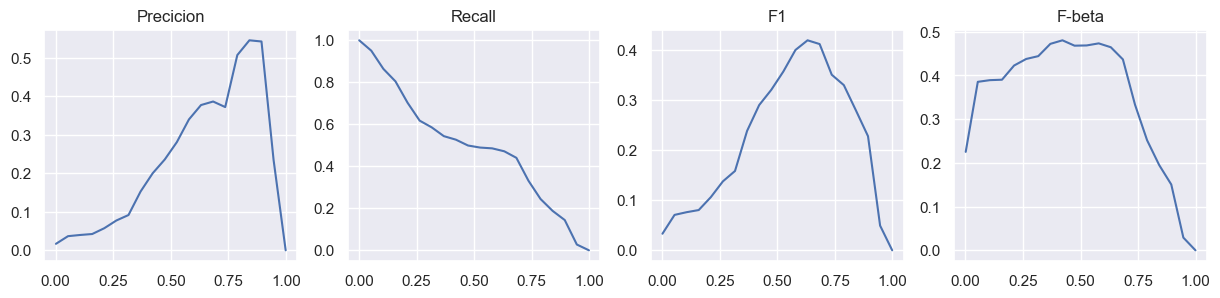

In [12]:
# best_params = {'n_estimators': 246, 'max_depth': 4, 'learning_rate': 0.01336443876805034, 'subsample': 0.6463282850483533, 'colsample_bytree': 0.8313068833483865, 'min_child_weight': 1, 'gamma': 1.8674512506957348, 'reg_alpha': 5.574491595970301, 'reg_lambda': 1.6836061653549808, 'scale_pos_weight': 7.286025143001134}

best_params = {'n_estimators': 297, 'max_depth': 3, 'learning_rate': 0.035945220741013736, 'subsample': 0.7341100732375431, 'colsample_bytree': 0.9953795550039859, 'min_child_weight': 4, 'gamma': 0.3909505373474582, 'reg_alpha': 7.311546429641343, 'reg_lambda': 0.9835545509646224, 'scale_pos_weight': 15.27610123192946}
# best_params = {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.026898887881948767, 'subsample': 0.7337002629923675, 'colsample_bytree': 0.9611689765248486, 'min_child_weight': 5, 'gamma': 1.8200795576345201, 'reg_alpha': 7.6485649310905215, 'reg_lambda': 0.07925701994769563, 'scale_pos_weight': 12.311320733333789}

{'n_estimators': 486, 'max_depth': 3, 'learning_rate': 0.028967985258635896, 'subsample': 0.6624652961273084, 'colsample_bytree': 0.9999155266553814, 'min_child_weight': 5, 'gamma': 2.6185327073409113, 'reg_alpha': 8.037777763035855, 'reg_lambda': 0.042497566899104555, 'scale_pos_weight': 11.760089900261818}

best_pred, feature_imps = get_xgb_result_with_params(best_params, X_train, y_train, X_test, y_test)

In [10]:
from sklearn.metrics import classification_report
thr = 0.7
print_confusion_matrix(best_pred, thr, y_test)

report_dict = classification_report(y_test, (best_pred >= thr).astype(int), output_dict=True)
pd.DataFrame(report_dict)


	real 1	real 0
pred 1	1927	2770	
pred 0	2578	273759	


,0,1,accuracy,macro avg,weighted avg
precision,0.990671,0.410262,0.98097,0.700466,0.981367
recall,0.989983,0.427747,0.98097,0.708865,0.980970
f1-score,0.990327,0.418822,0.98097,0.704574,0.981165
support,276529.000000,4505.000000,0.98097,281034.000000,281034.000000


In [14]:
from sklearn.metrics import classification_report
thr = 0.63
print_confusion_matrix(best_pred, thr, y_test)

report_dict = classification_report(y_test, (best_pred >= thr).astype(int), output_dict=True)
pd.DataFrame(report_dict)


	real 1	real 0
pred 1	2124	3517	
pred 0	2381	273012	


,0,1,accuracy,macro avg,weighted avg
precision,0.991354,0.376529,0.979013,0.683942,0.981498
recall,0.987282,0.471476,0.979013,0.729379,0.979013
f1-score,0.989314,0.418687,0.979013,0.704000,0.980167
support,276529.000000,4505.000000,0.979013,281034.000000,281034.000000


In [74]:
get_feature_to_importance(
    X_train.columns,
    feature_imps
)

outcoming_tx_cnt 0.19234791
output_address_cnt 0.12838577
btc_received_min 0.096798696
outcoming_tx_input_address_cnt_mean 0.087779395
user_user_ts_fees_share_mean 0.052322146
incoming_tx_whole_fee_4_cnt 0.04154164
outcoming_tx_ts_cnt 0.038700536
user_btc_transacted_total 0.031234138
incoming_tx_ts_gini 0.026934415
user_active_time_steps_cnt 0.023902886
big_inp_addr 0.023800345
user_output_users_cnt 0.021842059
input_address_cnt 0.018661354
btc_sent_max 0.017482655
btc_received_total 0.0140027
user_addr_cnt 0.013742805
incoming_tx_ts_cnt 0.012498497
outcoming_tx_fees_max 0.01245493
btc_received_gini 0.012192919
user_btc_sent_total 0.011975832
incoming_tx_fees_min 0.010853318
incoming_tx_output_address_cnt_mean 0.0093582235
btc_sent_total 0.008453092
outcoming_tx_fees_mean 0.00844351
btc_sent_mean 0.0074836398
user_btc_sent_median 0.0066104447
user_user_ts_fees_share_max 0.006597975
user_interracted_input_address_cnt 0.0065584118
btc_sent_min 0.00532
btc_sent_gini 0.004956702
btc_receiv

### Analyze not found fraud

In [46]:
BASIC_FIELDS = [
    "btc_received_total",
    "btc_sent_total",
    "incoming_tx_cnt",
    "outcoming_tx_cnt",

    "incoming_tx_fees_max",
    "outcoming_tx_fees_max"
]

In [47]:
best_pred_classes = (best_pred >= 0.65).astype(int)
best_pred_classes

not_found_fraud = ((best_pred_classes == 0) & (y_test == 1)).astype(int)


X_test.iloc[np.array(not_found_fraud) == 1][BASIC_FIELDS]

,btc_received_total,btc_sent_total,incoming_tx_cnt,outcoming_tx_cnt,incoming_tx_fees_max,outcoming_tx_fees_max
1397,4.972163,4.571836,23.0,26.0,0.000500,0.000374
4465,0.000000,0.010054,0.0,1.0,0.000000,0.023540
6435,19.849708,0.036842,1.0,1.0,0.006539,0.004820
6590,0.120332,0.007525,2.0,1.0,0.000600,0.000947
7721,3.364271,1.507036,1.0,1.0,0.003729,0.119673
...,...,...,...,...,...,...
280971,0.048636,0.000000,1.0,0.0,0.000366,0.000000
280972,0.093456,0.000000,1.0,0.0,0.000802,0.000000
280973,0.093456,0.000000,1.0,0.0,0.000802,0.000000
280974,0.409053,0.000000,1.0,0.0,0.000947,0.000000


In [48]:
best_pred_classes = (best_pred >= 0.65).astype(int)
best_pred_classes

false_positive = ((best_pred_classes == 1) & (y_test == 0)).astype(int)


X_test.iloc[np.array(false_positive) == 1][BASIC_FIELDS]

,btc_received_total,btc_sent_total,incoming_tx_cnt,outcoming_tx_cnt,incoming_tx_fees_max,outcoming_tx_fees_max
245,0.000000,0.040000,0.0,1.0,0.000000,0.001000
270,0.000000,0.340260,0.0,1.0,0.000000,0.000740
287,0.000000,0.307058,0.0,1.0,0.000000,0.000588
315,0.028254,750.234006,4.0,2.0,0.000100,0.000421
890,0.000000,1.999500,0.0,1.0,0.000000,0.000500
...,...,...,...,...,...,...
262155,0.062220,0.000000,2.0,0.0,0.000334,0.000000
262331,0.238052,0.000000,6.0,0.0,0.000695,0.000000
264096,0.154768,0.000000,2.0,0.0,0.000500,0.000000
264706,0.050548,0.000000,1.0,0.0,0.000440,0.000000


In [25]:
y_test.sum()

np.int64(4505)

### Analyze accuracy on users

In [51]:
best_pred_classes = (best_pred >= 0.65).astype(int)
best_pred_classes


array([0, 0, 0, ..., 0, 0, 0])

In [90]:
addr_to_class = test_data_raw[["addrId", "userId"]]
addr_to_class["predicted_wallet_class"] = best_pred_classes
addr_to_class["real_wallet_classes"] = y_test

addr_to_class = addr_to_class \
    .merge(
        pd.read_csv("../dataset/custom/UserClasses.csv"),
        how="left",
        on="userId",
    ) \
    .rename(columns={"class": "user_class_true"})
addr_to_class["user_class_true"] = (addr_to_class["user_class_true"] == 1).astype(int)
addr_to_class


,addrId,userId,predicted_wallet_class,real_wallet_classes,user_class_true
0,1CDaGcM5SSmkExKz1DpYNPbmryUPvbyYiL,179247,0,0,0
1,1DtwQsqdqPHrgUtAAGANbiRnhwv2xXm6Jb,450134,0,0,0
2,12NaccU2hdbqii1upcgnuaGLEhsDpxshwK,13938,0,0,0
3,1BGTyzQRj12rYy6aRmUQsZYoCw5sMbz6MU,13938,0,0,0
4,1G5yHgUjmQQrusLr9Mb3YykBoFT3UW4dkz,440608,0,0,0
...,...,...,...,...,...
281029,13h3xr1LJXQXn9QR3gio62xgdZYAoBrKYQ,558019,0,0,0
281030,1Dow13WsGdCYewjtxP1acvM47A2XoPx1fF,316706,0,0,0
281031,18rfNEMrpF4yqw3s2Y9jTSvsfiH6dYC7ph,365639,0,0,0
281032,1Ct6Sx8uKTubXPcuLX5jSKb6QKMcqf1Ybj,245756,0,0,0


In [80]:
user_classes_all = pd.read_csv("../dataset/custom/UserClasses.csv")

user_classes_all[user_classes_all["userId"].isin(addr_to_class["userId"])]["class"].value_counts()

class
3    145087
2     44376
1      1397
Name: count, dtype: int64

In [92]:
user_to_predicted_class = addr_to_class.groupby("userId")["predicted_wallet_class"].max()
user_to_predicted_class = user_to_predicted_class.reset_index().rename(columns={"predicted_wallet_class": "user_class_pred"})

user_to_predicted_class = user_to_predicted_class \
    .merge(
        pd.read_csv("../dataset/custom/UserClasses.csv"),
        how="left",
        on="userId",
    ) \
    .rename(columns={"class": "user_class_true"})
user_to_predicted_class["user_class_true"] = (user_to_predicted_class["user_class_true"] == 1).astype(int)

print_confusion_matrix(
    np.array(user_to_predicted_class["user_class_pred"]),
    0.1,
    np.array(user_to_predicted_class["user_class_true"]),
)

	real 1	real 0
pred 1	496	1724	
pred 0	901	187739	


In [94]:
addr_to_class = addr_to_class.merge(
    user_to_predicted_class[["userId", "user_class_pred"]],
    how="left",
    on="userId"
)
addr_to_class

,addrId,userId,predicted_wallet_class,real_wallet_classes,user_class_true,user_class_pred
0,1CDaGcM5SSmkExKz1DpYNPbmryUPvbyYiL,179247,0,0,0,0
1,1DtwQsqdqPHrgUtAAGANbiRnhwv2xXm6Jb,450134,0,0,0,0
2,12NaccU2hdbqii1upcgnuaGLEhsDpxshwK,13938,0,0,0,0
3,1BGTyzQRj12rYy6aRmUQsZYoCw5sMbz6MU,13938,0,0,0,0
4,1G5yHgUjmQQrusLr9Mb3YykBoFT3UW4dkz,440608,0,0,0,0
...,...,...,...,...,...,...
281029,13h3xr1LJXQXn9QR3gio62xgdZYAoBrKYQ,558019,0,0,0,0
281030,1Dow13WsGdCYewjtxP1acvM47A2XoPx1fF,316706,0,0,0,0
281031,18rfNEMrpF4yqw3s2Y9jTSvsfiH6dYC7ph,365639,0,0,0,0
281032,1Ct6Sx8uKTubXPcuLX5jSKb6QKMcqf1Ybj,245756,0,0,0,0


In [98]:
addr_to_class["user_class_pred"].value_counts()

user_class_pred
0    252212
1     28822
Name: count, dtype: int64

In [170]:
user_to_addr = pd.read_csv("../dataset/custom/AddrUser.csv")
user_to_addr = user_to_addr.groupby("userId")["addrId"].nunique().reset_index()
user_to_addr = user_to_addr.merge(
        pd.read_csv("../dataset/custom/UserClasses.csv"),
        how="left",
        on="userId",
    )
user_to_addr["class"] = (user_to_addr["class"] == 1).astype(int)
users_with_many_addrs = user_to_addr[(user_to_addr["addrId"] >= 100) & (user_to_addr["addrId"] <= 1000)]
users_with_many_addrs.shape


(197, 3)

In [164]:
users_with_many_addrs.shape

(213, 3)

In [150]:
addr_to_class

,addrId,userId,predicted_wallet_class,real_wallet_classes,user_class_true,user_class_pred,predicted_wallet_class_fixed
0,1CDaGcM5SSmkExKz1DpYNPbmryUPvbyYiL,179247,0,0,0,0,0
1,1DtwQsqdqPHrgUtAAGANbiRnhwv2xXm6Jb,450134,0,0,0,0,0
2,12NaccU2hdbqii1upcgnuaGLEhsDpxshwK,13938,0,0,0,0,0
3,1BGTyzQRj12rYy6aRmUQsZYoCw5sMbz6MU,13938,0,0,0,0,0
4,1G5yHgUjmQQrusLr9Mb3YykBoFT3UW4dkz,440608,0,0,0,0,0
...,...,...,...,...,...,...,...
281029,13h3xr1LJXQXn9QR3gio62xgdZYAoBrKYQ,558019,0,0,0,0,0
281030,1Dow13WsGdCYewjtxP1acvM47A2XoPx1fF,316706,0,0,0,0,0
281031,18rfNEMrpF4yqw3s2Y9jTSvsfiH6dYC7ph,365639,0,0,0,0,0
281032,1Ct6Sx8uKTubXPcuLX5jSKb6QKMcqf1Ybj,245756,0,0,0,0,0


In [ ]:
addr_to_class["predicted_wallet_class_fixed"] = addr_to_class["predicted_wallet_class"]
users_with_many_addrs_list = set(users_with_many_addrs["userId"].tolist())


def func(row):
    if row["userId"] in users_with_many_addrs_list:
        return row["user_class_pred"]
    return row["predicted_wallet_class"]


addr_to_class["predicted_wallet_class_fixed"] = addr_to_class.apply(
    func, axis=1
)

In [174]:

print_confusion_matrix(
    np.array(addr_to_class["predicted_wallet_class"]),
    0.1,
    np.array(addr_to_class["real_wallet_classes"]),
)
precision_score(
    np.array(addr_to_class["predicted_wallet_class"]),
    np.array(addr_to_class["real_wallet_classes"]),
), recall_score(
    np.array(addr_to_class["predicted_wallet_class"]),
    np.array(addr_to_class["real_wallet_classes"]),
)

	real 1	real 0
pred 1	2038	3415	
pred 0	2467	273114	


(np.float64(0.45238623751387347), np.float64(0.3737392261140656))

In [175]:

print_confusion_matrix(
    np.array(addr_to_class["predicted_wallet_class_fixed"]),
    0.1,
    np.array(addr_to_class["real_wallet_classes"]),
)
precision_score(
    np.array(addr_to_class["predicted_wallet_class_fixed"]),
    np.array(addr_to_class["real_wallet_classes"]),
), recall_score(
    np.array(addr_to_class["predicted_wallet_class_fixed"]),
    np.array(addr_to_class["real_wallet_classes"]),
)

	real 1	real 0
pred 1	2505	3822	
pred 0	2000	272707	


(np.float64(0.5560488346281909), np.float64(0.3959222380275012))

In [177]:
classification_report(np.array(addr_to_class["real_wallet_classes"]), np.array(addr_to_class["predicted_wallet_class_fixed"]))

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99    276529\n           1       0.40      0.56      0.46      4505\n\n    accuracy                           0.98    281034\n   macro avg       0.69      0.77      0.73    281034\nweighted avg       0.98      0.98      0.98    281034\n'

In [ ]:

    # user_to_addr[user_to_addr["class"] == 1].shape, user_to_addr[user_to_addr["class"] == 1]["addrId"].value_counts()

(31280, 3)

In [89]:
user_to_addr[user_to_addr["class"] == 0]["addrId"].value_counts()

addrId
1       532816
2        16815
3         5307
4         2745
5         1529
         ...  
741          1
395          1
152          1
1104         1
92           1
Name: count, Length: 217, dtype: int64

In [137]:
addr_to_class[addr_to_class["user_class_true"] == 1].groupby("userId")["predicted_wallet_class"].nunique().value_counts()

predicted_wallet_class
1    1385
2      12
Name: count, dtype: int64

In [144]:
tm = addr_to_class[addr_to_class["user_class_true"] == 1].groupby("userId")["predicted_wallet_class"].nunique().reset_index()
tm = tm[tm["predicted_wallet_class"] == 2]

tm

,userId,predicted_wallet_class
0,4,2
1,32,2
4,128,2
13,244,2
16,367,2
20,539,2
26,927,2
39,2271,2
51,4741,2
72,10294,2


In [147]:
user_to_addr[user_to_addr["userId"] == 244]

,userId,addrId,class
243,244,5958,1


# XGB (no users)

In [57]:
X_train_no_users, X_test_no_users, y_train, y_test = get_prepared_train_test(
    train_data_raw,
    test_data_raw,
    type="no_users"
)
X_train_no_users.shape, X_test_no_users.shape

((552376, 33), (281034, 33))

In [59]:
X_train_no_users.head()

,btc_received_total,btc_received_min,btc_received_max,btc_received_mean,incoming_tx_cnt,incoming_tx_input_address_cnt_mean,incoming_tx_output_address_cnt_mean,btc_received_gini,input_address_cnt,incoming_tx_fees_min,...,outcoming_tx_fees_max,outcoming_tx_whole_fee_4_cnt,outcoming_tx_fees_total,outcoming_tx_ts_cnt,outcoming_tx_ts_gini,incoming_tx_ts_cnt,incoming_tx_ts_gini,lifetime_in_blocks,big_bct_received,big_inp_addr
0,6.999303,6.999303,6.999303,6.999303,1.0,1.0,2.0,0.0,1.0,0.0010,...,0.0010,1.0,0.0010,1.0,0.0,1.0,0.0,0.0,0,0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0001,1.0,0.0001,1.0,0.0,0.0,0.0,0.0,0,0
2,0.390310,0.390310,0.390310,0.390310,1.0,4.0,2.0,0.0,4.0,0.0001,...,0.0001,1.0,0.0001,1.0,0.0,1.0,0.0,8071.0,0,0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0001,1.0,0.0001,1.0,0.0,0.0,0.0,0.0,0,0
4,3.200299,3.200299,3.200299,3.200299,1.0,1.0,2.0,0.0,1.0,0.0001,...,0.0001,1.0,0.0001,1.0,0.0,1.0,0.0,0.0,0,0


In [60]:
import optuna

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 60.0)
    }

    model = xgb.XGBClassifier(**params, random_state=42, eval_metric="logloss")

    model.fit(X_train_no_users, y_train)

    y_pred = model.predict_proba(X_test_no_users)[:,1]
    metric, thr = get_best_metric_for_optuna(y_pred, y_test)
    print_confusion_matrix(y_pred, thr, y_test)

    return metric

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

[I 2025-04-02 18:01:56,924] A new study created in memory with name: no-name-f3efee3c-3d7f-44be-960f-12950a88fde3
[I 2025-04-02 18:02:01,834] Trial 0 finished with value: 0.18319051813886442 and parameters: {'n_estimators': 379, 'max_depth': 14, 'learning_rate': 0.11601122770735801, 'subsample': 0.5137718281035082, 'colsample_bytree': 0.8776294035341927, 'min_child_weight': 7, 'gamma': 3.41805419090194, 'reg_alpha': 0.7010434743715777, 'reg_lambda': 5.043364656204115, 'scale_pos_weight': 7.3865672322787175}. Best is trial 0 with value: 0.18319051813886442.


	real 1	real 0
pred 1	915	6039	
pred 0	3590	270490	


[I 2025-04-02 18:02:06,331] Trial 1 finished with value: 0.1704414334223453 and parameters: {'n_estimators': 364, 'max_depth': 11, 'learning_rate': 0.10241623143120847, 'subsample': 0.8852853123029178, 'colsample_bytree': 0.6243531696501423, 'min_child_weight': 6, 'gamma': 2.1107804094218063, 'reg_alpha': 7.43257627085331, 'reg_lambda': 5.941860028828701, 'scale_pos_weight': 47.50833100954959}. Best is trial 0 with value: 0.18319051813886442.


	real 1	real 0
pred 1	1034	11279	
pred 0	3471	265250	


[I 2025-04-02 18:02:08,596] Trial 2 finished with value: 0.19354545099925885 and parameters: {'n_estimators': 244, 'max_depth': 5, 'learning_rate': 0.01407173918469413, 'subsample': 0.8243575223559436, 'colsample_bytree': 0.6513702584606416, 'min_child_weight': 9, 'gamma': 3.880058041824728, 'reg_alpha': 0.7379179570322036, 'reg_lambda': 6.414695258297303, 'scale_pos_weight': 54.58712994774269}. Best is trial 2 with value: 0.19354545099925885.


	real 1	real 0
pred 1	2977	55910	
pred 0	1528	220619	


[I 2025-04-02 18:02:11,186] Trial 3 finished with value: 0.2078452574037364 and parameters: {'n_estimators': 364, 'max_depth': 4, 'learning_rate': 0.2099850766511534, 'subsample': 0.9195984284562653, 'colsample_bytree': 0.9250602998031014, 'min_child_weight': 10, 'gamma': 2.0560024732523097, 'reg_alpha': 4.024343243085601, 'reg_lambda': 9.04863553125789, 'scale_pos_weight': 53.799959834446284}. Best is trial 3 with value: 0.2078452574037364.


	real 1	real 0
pred 1	2076	29845	
pred 0	2429	246684	


[I 2025-04-02 18:02:12,825] Trial 4 finished with value: 0.12291068715178119 and parameters: {'n_estimators': 139, 'max_depth': 14, 'learning_rate': 0.29997462742437403, 'subsample': 0.988835698245146, 'colsample_bytree': 0.9466130011922085, 'min_child_weight': 7, 'gamma': 1.562845206519004, 'reg_alpha': 7.122680306375393, 'reg_lambda': 6.713839626823716, 'scale_pos_weight': 51.04444883042056}. Best is trial 3 with value: 0.2078452574037364.


	real 1	real 0
pred 1	728	10867	
pred 0	3777	265662	


[I 2025-04-02 18:02:16,806] Trial 5 finished with value: 0.22511880515953836 and parameters: {'n_estimators': 464, 'max_depth': 6, 'learning_rate': 0.1529768067579743, 'subsample': 0.8766274291340819, 'colsample_bytree': 0.5542510034075209, 'min_child_weight': 3, 'gamma': 0.6960041943321449, 'reg_alpha': 5.747135741776028, 'reg_lambda': 6.019774427657442, 'scale_pos_weight': 51.44644983631065}. Best is trial 5 with value: 0.22511880515953836.


	real 1	real 0
pred 1	1658	17147	
pred 0	2847	259382	


[I 2025-04-02 18:02:21,042] Trial 6 finished with value: 0.14584796068168762 and parameters: {'n_estimators': 393, 'max_depth': 11, 'learning_rate': 0.040556705233783186, 'subsample': 0.9950809749733387, 'colsample_bytree': 0.6803324168785745, 'min_child_weight': 7, 'gamma': 2.6776366158685736, 'reg_alpha': 2.861018440521188, 'reg_lambda': 3.292222374197331, 'scale_pos_weight': 13.900930626372467}. Best is trial 5 with value: 0.22511880515953836.


	real 1	real 0
pred 1	914	12400	
pred 0	3591	264129	


[I 2025-04-02 18:02:22,622] Trial 7 finished with value: 0.30274211443968935 and parameters: {'n_estimators': 165, 'max_depth': 5, 'learning_rate': 0.08736400702990445, 'subsample': 0.8949447969701432, 'colsample_bytree': 0.9590922922668679, 'min_child_weight': 6, 'gamma': 4.93059871579762, 'reg_alpha': 6.848969580777697, 'reg_lambda': 0.7346592272958152, 'scale_pos_weight': 4.35905775527983}. Best is trial 7 with value: 0.30274211443968935.


	real 1	real 0
pred 1	1528	5688	
pred 0	2977	270841	


[I 2025-04-02 18:02:29,032] Trial 8 finished with value: 0.1476053720753442 and parameters: {'n_estimators': 486, 'max_depth': 11, 'learning_rate': 0.015504144580057711, 'subsample': 0.8360911140441758, 'colsample_bytree': 0.6549719757695784, 'min_child_weight': 5, 'gamma': 4.098112266301594, 'reg_alpha': 5.128645652822828, 'reg_lambda': 6.5381099383678585, 'scale_pos_weight': 40.442191637659}. Best is trial 7 with value: 0.30274211443968935.


	real 1	real 0
pred 1	1398	27938	
pred 0	3107	248591	


[I 2025-04-02 18:02:30,046] Trial 9 finished with value: 0.19077311361021415 and parameters: {'n_estimators': 70, 'max_depth': 5, 'learning_rate': 0.20271535259123433, 'subsample': 0.6924345924166015, 'colsample_bytree': 0.5566074665172653, 'min_child_weight': 8, 'gamma': 2.1251750996720524, 'reg_alpha': 7.240404791186062, 'reg_lambda': 2.0396643114132673, 'scale_pos_weight': 50.9332297493039}. Best is trial 7 with value: 0.30274211443968935.


	real 1	real 0
pred 1	2056	33810	
pred 0	2449	242719	


[I 2025-04-02 18:02:32,489] Trial 10 finished with value: 0.2226278745906884 and parameters: {'n_estimators': 215, 'max_depth': 7, 'learning_rate': 0.04949299713607139, 'subsample': 0.7241651506492124, 'colsample_bytree': 0.8117445594277664, 'min_child_weight': 1, 'gamma': 4.902291211298407, 'reg_alpha': 9.75360752178439, 'reg_lambda': 0.5331972401628915, 'scale_pos_weight': 23.207403620392974}. Best is trial 7 with value: 0.30274211443968935.


	real 1	real 0
pred 1	2366	32752	
pred 0	2139	243777	


[I 2025-04-02 18:02:34,418] Trial 11 finished with value: 0.18843673253919072 and parameters: {'n_estimators': 162, 'max_depth': 7, 'learning_rate': 0.08958740728752099, 'subsample': 0.7935893620292448, 'colsample_bytree': 0.5053479516797128, 'min_child_weight': 3, 'gamma': 0.034760030484000115, 'reg_alpha': 5.712251790730937, 'reg_lambda': 3.7190201028635124, 'scale_pos_weight': 29.333254989861146}. Best is trial 7 with value: 0.30274211443968935.


	real 1	real 0
pred 1	1642	23907	
pred 0	2863	252622	


[I 2025-04-02 18:02:37,449] Trial 12 finished with value: 0.3831020477238111 and parameters: {'n_estimators': 498, 'max_depth': 3, 'learning_rate': 0.032096215467556935, 'subsample': 0.6526205291345932, 'colsample_bytree': 0.7657285731034092, 'min_child_weight': 4, 'gamma': 0.5597409684953621, 'reg_alpha': 9.303964985041036, 'reg_lambda': 8.729302961172813, 'scale_pos_weight': 1.62574962922008}. Best is trial 12 with value: 0.3831020477238111.


	real 1	real 0
pred 1	1811	3805	
pred 0	2694	272724	


[I 2025-04-02 18:02:39,532] Trial 13 finished with value: 0.3842448657879757 and parameters: {'n_estimators': 301, 'max_depth': 3, 'learning_rate': 0.02952682506691833, 'subsample': 0.6450211787261498, 'colsample_bytree': 0.7796538829148326, 'min_child_weight': 4, 'gamma': 1.1024936143845745, 'reg_alpha': 9.825978912344024, 'reg_lambda': 9.013497779576879, 'scale_pos_weight': 2.725196474156631}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1755	3062	
pred 0	2750	273467	


[I 2025-04-02 18:02:41,555] Trial 14 finished with value: 0.3822220301629143 and parameters: {'n_estimators': 299, 'max_depth': 3, 'learning_rate': 0.02638831943902743, 'subsample': 0.6261902940803121, 'colsample_bytree': 0.7899747019645718, 'min_child_weight': 4, 'gamma': 0.9840180553151116, 'reg_alpha': 8.856367077417179, 'reg_lambda': 9.561811797223202, 'scale_pos_weight': 1.0697678250719858}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1769	3352	
pred 0	2736	273177	


[I 2025-04-02 18:02:43,639] Trial 15 finished with value: 0.314934448033441 and parameters: {'n_estimators': 297, 'max_depth': 3, 'learning_rate': 0.02866892564618799, 'subsample': 0.6066401552572197, 'colsample_bytree': 0.7370174934318061, 'min_child_weight': 2, 'gamma': 4.912008583612959e-05, 'reg_alpha': 9.997508399628655, 'reg_lambda': 8.529403427284084, 'scale_pos_weight': 15.791344680784619}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1989	11569	
pred 0	2516	264960	


[I 2025-04-02 18:02:48,747] Trial 16 finished with value: 0.1886810908094996 and parameters: {'n_estimators': 443, 'max_depth': 9, 'learning_rate': 0.010043890469087583, 'subsample': 0.6351842727415248, 'colsample_bytree': 0.851374445691351, 'min_child_weight': 4, 'gamma': 0.922653387523299, 'reg_alpha': 8.465445197627103, 'reg_lambda': 7.950467145917196, 'scale_pos_weight': 13.317883917300765}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1929	31169	
pred 0	2576	245360	


[I 2025-04-02 18:02:53,360] Trial 17 finished with value: 0.21516852452104251 and parameters: {'n_estimators': 423, 'max_depth': 8, 'learning_rate': 0.02939266021250709, 'subsample': 0.5312608406528927, 'colsample_bytree': 0.7334838183600126, 'min_child_weight': 4, 'gamma': 1.299576897294092, 'reg_alpha': 8.531331939303831, 'reg_lambda': 9.797541763167484, 'scale_pos_weight': 21.06845455506819}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1633	18294	
pred 0	2872	258235	


[I 2025-04-02 18:02:55,530] Trial 18 finished with value: 0.33771679054697923 and parameters: {'n_estimators': 323, 'max_depth': 3, 'learning_rate': 0.06131920893521108, 'subsample': 0.6796652991318954, 'colsample_bytree': 0.7696138472680858, 'min_child_weight': 1, 'gamma': 0.5110763240964972, 'reg_alpha': 3.156748357402643, 'reg_lambda': 7.559159958957658, 'scale_pos_weight': 8.24596941392215}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1772	6443	
pred 0	2733	270086	


[I 2025-04-02 18:03:01,323] Trial 19 finished with value: 0.1817569211762724 and parameters: {'n_estimators': 495, 'max_depth': 9, 'learning_rate': 0.018054663195652715, 'subsample': 0.5722496261026843, 'colsample_bytree': 0.8547155159122299, 'min_child_weight': 5, 'gamma': 1.5413209436725501, 'reg_alpha': 9.370136738281303, 'reg_lambda': 7.6066432333322584, 'scale_pos_weight': 36.92810321451982}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1942	33461	
pred 0	2563	243068	


[I 2025-04-02 18:03:02,378] Trial 20 finished with value: 0.2778511785223549 and parameters: {'n_estimators': 78, 'max_depth': 4, 'learning_rate': 0.039704186952299034, 'subsample': 0.7573171404748458, 'colsample_bytree': 0.7090058169472826, 'min_child_weight': 3, 'gamma': 3.008765566210064, 'reg_alpha': 7.854424585631575, 'reg_lambda': 8.60959659467405, 'scale_pos_weight': 21.539049057055983}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	2103	17721	
pred 0	2402	258808	


[I 2025-04-02 18:03:04,270] Trial 21 finished with value: 0.3800256629597947 and parameters: {'n_estimators': 261, 'max_depth': 3, 'learning_rate': 0.024292925153904573, 'subsample': 0.6455325320385682, 'colsample_bytree': 0.7797588335088765, 'min_child_weight': 4, 'gamma': 0.8440946423727834, 'reg_alpha': 8.818272172326875, 'reg_lambda': 9.81034715607413, 'scale_pos_weight': 2.794759684743722}. Best is trial 13 with value: 0.3842448657879757.


	real 1	real 0
pred 1	1777	3583	
pred 0	2728	272946	


[I 2025-04-02 18:03:06,774] Trial 22 finished with value: 0.38747884940778343 and parameters: {'n_estimators': 321, 'max_depth': 4, 'learning_rate': 0.022029883317184456, 'subsample': 0.6032198341257682, 'colsample_bytree': 0.811054958759173, 'min_child_weight': 2, 'gamma': 0.4185327809074679, 'reg_alpha': 9.047825559667798, 'reg_lambda': 9.991007132661824, 'scale_pos_weight': 3.081360078594262}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	1832	3788	
pred 0	2673	272741	


[I 2025-04-02 18:03:09,392] Trial 23 finished with value: 0.3651148607440537 and parameters: {'n_estimators': 335, 'max_depth': 4, 'learning_rate': 0.02019984616508935, 'subsample': 0.5787814260838069, 'colsample_bytree': 0.8976984520320701, 'min_child_weight': 2, 'gamma': 0.3730994143566624, 'reg_alpha': 9.896339514798298, 'reg_lambda': 8.881697998730722, 'scale_pos_weight': 9.197236707708871}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	1796	4779	
pred 0	2709	271750	


[I 2025-04-02 18:03:11,618] Trial 24 finished with value: 0.2291895227646736 and parameters: {'n_estimators': 221, 'max_depth': 6, 'learning_rate': 0.06063003909755076, 'subsample': 0.6789997418208361, 'colsample_bytree': 0.8277379905198705, 'min_child_weight': 2, 'gamma': 1.2851232173168161, 'reg_alpha': 8.084689194167296, 'reg_lambda': 7.943685810849822, 'scale_pos_weight': 11.768344751071421}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	1337	9811	
pred 0	3168	266718	


[I 2025-04-02 18:03:14,587] Trial 25 finished with value: 0.37530373315661586 and parameters: {'n_estimators': 415, 'max_depth': 4, 'learning_rate': 0.037031806554740726, 'subsample': 0.553620717296419, 'colsample_bytree': 0.7022855273374803, 'min_child_weight': 3, 'gamma': 0.35401334495612924, 'reg_alpha': 6.362953946715608, 'reg_lambda': 9.792138403200434, 'scale_pos_weight': 1.2696568081257984}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	1699	2916	
pred 0	2806	273613	


[I 2025-04-02 18:03:17,924] Trial 26 finished with value: 0.2697836237678152 and parameters: {'n_estimators': 340, 'max_depth': 6, 'learning_rate': 0.011441798704573408, 'subsample': 0.7296990583491407, 'colsample_bytree': 0.8109770908995813, 'min_child_weight': 5, 'gamma': 1.5922986261568686, 'reg_alpha': 9.154110852879217, 'reg_lambda': 7.085336099023927, 'scale_pos_weight': 17.634867984903035}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	1768	12979	
pred 0	2737	263550	


[I 2025-04-02 18:03:20,459] Trial 27 finished with value: 0.37300815757217126 and parameters: {'n_estimators': 288, 'max_depth': 5, 'learning_rate': 0.022104570944915025, 'subsample': 0.5996351037653846, 'colsample_bytree': 0.7531337351786189, 'min_child_weight': 2, 'gamma': 0.28991742569304574, 'reg_alpha': 7.909371953418559, 'reg_lambda': 5.2117772508612985, 'scale_pos_weight': 5.706933634195327}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	1765	3874	
pred 0	2740	272655	


[I 2025-04-02 18:03:22,090] Trial 28 finished with value: 0.22562373311610814 and parameters: {'n_estimators': 203, 'max_depth': 3, 'learning_rate': 0.03338092111971992, 'subsample': 0.6580790784246541, 'colsample_bytree': 0.9970354054489632, 'min_child_weight': 1, 'gamma': 1.1733876916885768, 'reg_alpha': 9.193163238229646, 'reg_lambda': 9.027860778212977, 'scale_pos_weight': 29.836423734950596}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	2382	32385	
pred 0	2123	244144	


[I 2025-04-02 18:03:27,936] Trial 29 finished with value: 0.25066009505368775 and parameters: {'n_estimators': 393, 'max_depth': 13, 'learning_rate': 0.04949956269643243, 'subsample': 0.504798403703785, 'colsample_bytree': 0.8802730498333252, 'min_child_weight': 6, 'gamma': 1.7696406470797752, 'reg_alpha': 6.5442045107950095, 'reg_lambda': 8.319074662813652, 'scale_pos_weight': 10.08454520727597}. Best is trial 22 with value: 0.38747884940778343.


	real 1	real 0
pred 1	1424	8961	
pred 0	3081	267568	



        Best threshold: 0.15857894736842104
        Best F1: 0.3023148148148148, precicion: 0.23169722057953873, recall: 0.434850166481687
        


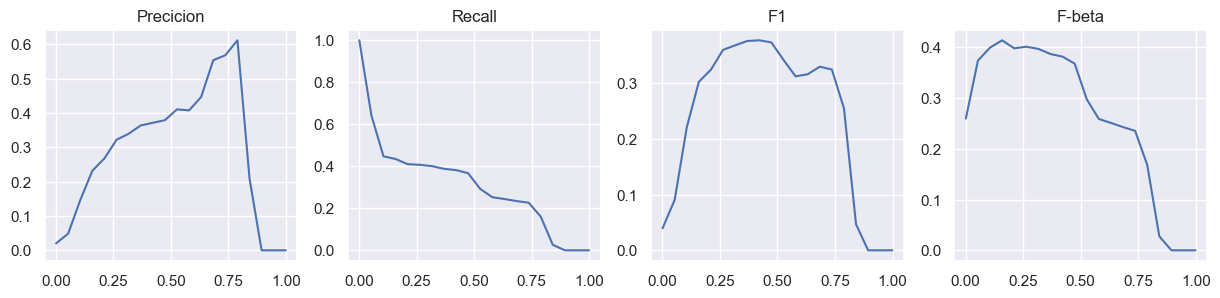

In [80]:
# best_params_no_users = {'n_estimators': 288, 'max_depth': 5, 'learning_rate': 0.022104570944915025, 'subsample': 0.5996351037653846, 'colsample_bytree': 0.7531337351786189, 'min_child_weight': 2, 'gamma': 0.28991742569304574, 'reg_alpha': 7.909371953418559, 'reg_lambda': 5.2117772508612985, 'scale_pos_weight': 5.706933634195327}
best_params_no_users = {'n_estimators': 321, 'max_depth': 4, 'learning_rate': 0.022029883317184456, 'subsample': 0.6032198341257682, 'colsample_bytree': 0.811054958759173, 'min_child_weight': 2, 'gamma': 0.4185327809074679, 'reg_alpha': 9.047825559667798, 'reg_lambda': 9.991007132661824, 'scale_pos_weight': 3.081360078594262}

best_pred_no_users, feature_imps_no_users = get_xgb_result_with_params(best_params_no_users, X_train_no_users, y_train, X_test_no_users, y_test)

In [83]:
from sklearn.metrics import classification_report
thr = 0.4
print_confusion_matrix(best_pred_no_users, thr, y_test)

report_dict = classification_report(y_test, (best_pred_no_users >= thr).astype(int), output_dict=True)
pd.DataFrame(report_dict)


	real 1	real 0
pred 1	1725	2959	
pred 0	2780	273570	


,0,1,accuracy,macro avg,weighted avg
precision,0.989940,0.368275,0.979579,0.679108,0.979975
recall,0.989299,0.382908,0.979579,0.686104,0.979579
f1-score,0.989620,0.375449,0.979579,0.682534,0.979775
support,276529.000000,4505.000000,0.979579,281034.000000,281034.000000


In [84]:
get_feature_to_importance(
    X_train_no_users.columns,
    feature_imps_no_users
)

incoming_tx_whole_fee_4_cnt 0.14661653
incoming_tx_fees_min 0.11574001
btc_sent_total 0.094785124
input_address_cnt 0.08735459
output_address_cnt 0.075620644
btc_received_max 0.06950354
incoming_tx_input_address_cnt_mean 0.06251208
outcoming_tx_output_address_cnt_mean 0.054143343
btc_sent_min 0.039663017
outcoming_tx_input_address_cnt_mean 0.037738807
outcoming_tx_whole_fee_4_cnt 0.035395116
big_inp_addr 0.034708552
btc_received_total 0.021735476
outcoming_tx_cnt 0.021038068
btc_received_mean 0.01961134
outcoming_tx_fees_total 0.01685834
incoming_tx_output_address_cnt_mean 0.012299692
incoming_tx_cnt 0.010950909
outcoming_tx_fees_max 0.008107311
incoming_tx_fees_max 0.006513661
btc_sent_gini 0.006146312
incoming_tx_ts_cnt 0.0059090303
outcoming_tx_ts_gini 0.0051135337
btc_received_gini 0.0045639914
btc_received_min 0.0034917928
outcoming_tx_fees_mean 0.0017164473
incoming_tx_ts_gini 0.000960635
btc_sent_max 0.00032764033
outcoming_tx_ts_cnt 0.0003142049
btc_sent_mean 0.00028669476
outc

# Random forest


        Best threshold: 0.053526315789473686
        Best F1: 0.18599774783520368, precicion: 0.11271649096385543, recall: 0.5316315205327414
        


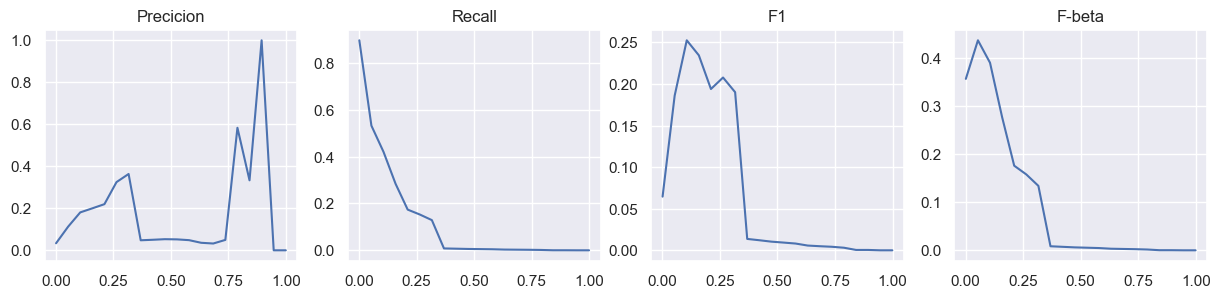

In [19]:
import xgboost as xgb

column_transformer = ColumnTransformer(
    transformers=[
        ('min_max_scale', MinMaxScaler(), list(set(X_train.columns))),
    ]
)

pipeline = Pipeline(steps=[
    ('transformers', column_transformer),
    ('xgb', RandomForestClassifier(n_estimators=150, class_weight={0: 1, 1: 30}))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_vals = model.predict(X_test)

res = get_best_threshold(y_pred, y_test, return_hists=True)

In [22]:
thr = 0.3
print_confusion_matrix(y_pred, thr, y_test)

report_dict = classification_report(y_test, (y_pred >= thr).astype(int), output_dict=True)
pd.DataFrame(report_dict)


	real 1	real 0
pred 1	585	1184	
pred 0	3920	275345	


,0,1,accuracy,macro avg,weighted avg
precision,0.985963,0.330695,0.981838,0.658329,0.975459
recall,0.995718,0.129856,0.981838,0.562787,0.981838
f1-score,0.990817,0.186484,0.981838,0.588650,0.977923
support,276529.000000,4505.000000,0.981838,281034.000000,281034.000000


In [85]:
wallets_feats = pd.read_csv("../dataset/custom/features_fixed/wallets_features_agg.csv")[["addrId", "class"]]


In [123]:
wallets_feats[wallets_feats["class"] == 1]["addrId"].sample(20)

758284    13ifz5muK4qjZvkhgYE3i2wqBZsKACftj4
307362    1Cmpd6z6SLGskKqBDXjcLjg9abR3At5trh
641660     1Htgk9kQsXvF93B2xFSaFZGpjZNc5JKwD
374879    1KY2kgVuscMAjge5vqBAgwTmsDSsf31Vo2
397997    16hJCmsCKyW7ycwM8urwGwtEdfXe8PuaLR
200296    13gL1bQKhxcMC8dHVztLKJK48cCzE8N2cP
243381    1L5UTTceW1R9UQSpPw5ebkNKbnNmNPEfbQ
396504    1GEEuK1BgX7z9Hx1g5RBm716D41Nxotyp8
261040    1FJ7Ny7gHL4j5UMkGnb4va5TjzvoiVtxyo
321185    1Grdi3chMounJpu9ZWVFoHecnC2QY6QWv1
170929    1Kn7yCgVFcxZhzcTgcXdzFez8NzSyb32s1
98194     1MQzeUEpoFpPssg4Vtnx8mk2xqaKwjH8KT
316298    1QA7gCL3ZmL1GfgFJSTvwXmKH5GsdKHYN1
292394    13R6TwsnBuG61TJYfrTVzZMXDctArStfRB
327425    158meK2xYj5vTVkSXiv3Qcq4W4SZGfxUSD
390640    1PgLc1hys3LSo5ahFT5megMG1KJaAckTbL
271201    1BsJqx5rZa49TDVMV96YJk154HdxD8kwEe
393032    12jxf45JirwyFU9CWprwGJcM4w2TQ5TbMZ
173170    1PAE2wmGEHUPnMV9J3VCBMyTFAY7pF5YpF
243007    1C8QmvLyU26VRDrAEcojBCw421hJbHTX5Y
Name: addrId, dtype: object

{'a'}

In [118]:
wallets_feats["dist_chars"] = wallets_feats["addrId"].apply(lambda x : len(set(x[:5].lower() + x[-5:].lower())))
wallets_feats

,addrId,class,dist_chars
0,14YRXHHof4BY1TVxN5FqYPcEdpmXiYT78a,3,9
1,13Lhad3SAmu2vqYg2dxbNcxH7LE77kJu2w,3,10
2,1MAQQZn7EHP6J3erXByCciFiVcgS8ZhWqz,3,7
3,16zs5SVSyADh5WrLNbZbpRLsBsN5uEzgeK,3,8
4,1QJpwtUorBKPGUJkSyrRcBKTAHq4CXrdYh,3,10
...,...,...,...
822937,13h3xr1LJXQXn9QR3gio62xgdZYAoBrKYQ,3,9
822938,1Dow13WsGdCYewjtxP1acvM47A2XoPx1fF,3,7
822939,18rfNEMrpF4yqw3s2Y9jTSvsfiH6dYC7ph,3,10
822940,1Ct6Sx8uKTubXPcuLX5jSKb6QKMcqf1Ybj,3,9


<Axes: >

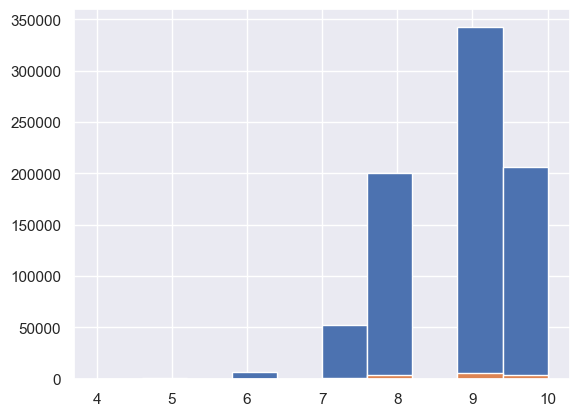

In [120]:
wallets_feats[wallets_feats["class"] != 1]["dist_chars"].hist()
wallets_feats[wallets_feats["class"] == 1]["dist_chars"].hist()


In [121]:
wallets_feats[wallets_feats["class"] != 1]["dist_chars"].value_counts()

dist_chars
9     342818
10    206387
8     200403
7      52524
6       6165
5        369
4         10
Name: count, dtype: int64

In [122]:
wallets_feats[wallets_feats["class"] == 1]["dist_chars"].value_counts()

dist_chars
9     6086
10    3625
8     3506
7      927
6      117
5        4
4        1
Name: count, dtype: int64